In [1]:
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from nltk import word_tokenize
from nltk.probability import FreqDist
import nltk
import urllib.request
from bs4 import BeautifulSoup

In [2]:
petz_mask = np.array(Image.open("C:/Users/matheus.pavani/Desktop/Turma_735_DS/mp/petz_logo.jpg"))

In [3]:
def transform_format(val):
  val[val == 0] = 255
  return val

In [4]:
transformed_petz_mask = np.ndarray((petz_mask.shape[0], petz_mask.shape[1]), np.int32)

for i in range(len(petz_mask)):
  transformed_petz_mask[i] = transform_format(transformed_petz_mask[i])

In [5]:
text_file = urllib.request.urlopen("https://pt.wikipedia.org/wiki/Petz_(empresa)")

response = text_file.read()
soup = BeautifulSoup(response, 'html.parser')
text = soup.get_text()
text = text.lower()

print(text[1400:2000])


cial

pet center comércio e participações sa


tipo

empresa de capital aberto


cotação

b3: petz3


atividade

varejo, pet shop


fundação

2002


fundador(es)

sergio zimerman


sede

são paulo,  brasil


área(s) servida(s)

 brasil


faturamento

 r$ 920 milhões (2018)[1]


sucessora(s)

pet center marginal


website oficial

petz.com.br


a petz, anteriormente chamada de pet center marginal, é uma rede brasileira de pet shops. é a maior rede de pet shop do brasil e é especializada em serviços e venda de produtos para animais de estimação e animais domésticáveis exóticos.[2]
foi fundada em


In [6]:
words = word_tokenize(text)

In [7]:
#Criando uma lista vazia
words_no_punc = []

#Iterando para remover as pontuações
for word in words:
    if word.isalpha():
        words_no_punc.append(word.lower())

In [8]:
from nltk.corpus import stopwords
#import nltk

#nltk.download('stopwords')

#list de stopwords em port.
stopwords_list = stopwords.words("portuguese")

In [9]:
#Criando uma lista vazia
clean_words = []

#Iterando sobre a lista sem pontuação
for word in words_no_punc:
    if word not in stopwords_list:
        clean_words.append(word)

In [10]:
clean_words_string = " ".join(clean_words)

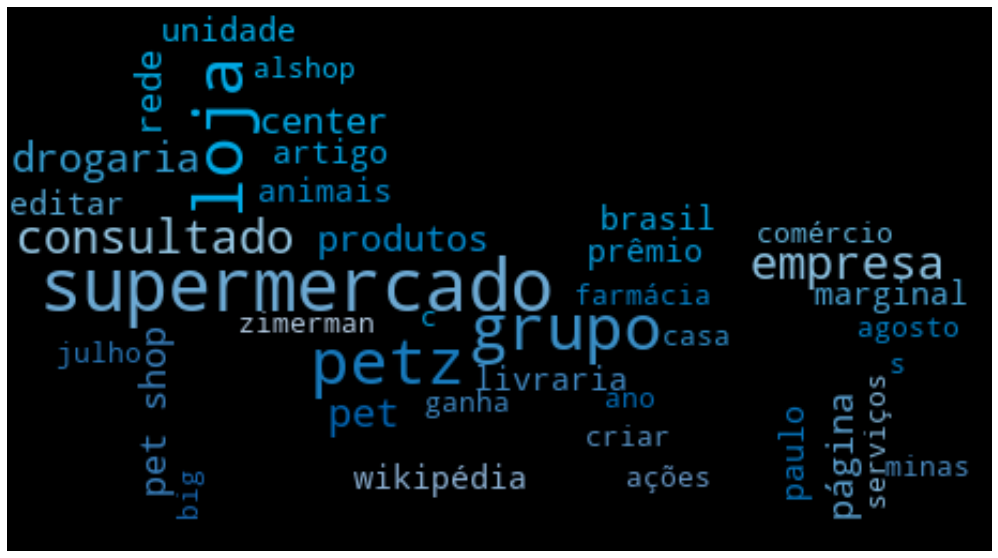

In [11]:
wc = WordCloud(background_color='black',
               mask=petz_mask,
               mode='RGBA',
               max_font_size=130,
               min_font_size=10,
               random_state=24).generate(clean_words_string)

# store to file
wc.to_file('petz_wc.png')
image_colors = ImageColorGenerator(petz_mask)

# show
plt.figure(figsize=[20,10])
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
from nltk.probability import FreqDist
from matplotlib import pyplot as plt

In [13]:
#Trazendo as informações via Url
text_file = urllib.request.urlopen("https://www.institutoprincipia.org/post/emmy-noether-e-as-leis-de-conserva%C3%A7%C3%A3o")

#Lendo apenas o texto da página
response = text_file.read().decode('utf-8')
soup = BeautifulSoup(response,'html.parser')
text = soup.get_text()
text = text.lower()

#Vendo uma parte do texto
print(text[1400:2000])

correspondência entre as leis de conservação e as simetrias de um sistema físico. este resultado é considerado por muitos, o resultado mais bonito da física.amalie emmy noether (1882-1935) foi uma matemática alemã, considerada por einstein “a mulher mais importante na história da matemática''. ela fez diversas contribuições para a álgebra, porém na física, seu nome é mais conhecido devido ao chamado teorema de noether.o teorema de noether diz que sempre existe uma simetria correspondente a cada lei de conservação. por exemplo: se podemos fazer o mesmo experimento em qualquer lugar do espaço se


In [14]:
#tokenizando por palavras
words = word_tokenize(text)

#contando as palavras
print(f"O número de palavras no texto é  {len(words)}")

O número de palavras no texto é  565


In [15]:
#Expondo a freq.
fdist = FreqDist(words)

#Colocando as 10 palavras mais comuns
fdist.most_common(10)

[('de', 33),
 (',', 24),
 ('que', 13),
 ('conservação', 12),
 ('da', 12),
 ('e', 9),
 ('.', 9),
 ('por', 9),
 ('é', 9),
 ('o', 9)]

In [16]:
#Criando uma lista vazia
words_no_punc = []

#Iterando para remover as pontuações
for word in words:
    if word.isalpha():
        words_no_punc.append(word.lower())


print(f"O número de palavras sem pontuação é {len(words_no_punc)}")

O número de palavras sem pontuação é 476


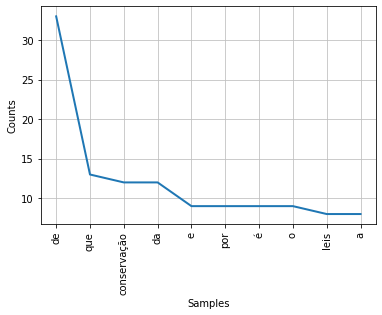

In [17]:
#Estabelecendo a frequência
fdist = FreqDist(words_no_punc)

#Colocando as 10 palavras mais comuns
fdist.plot(10)
plt.show()

In [18]:
#Criando uma lista vazia
clean_words = []

#Iterando sobre a lista sem pontuação
for word in words_no_punc:
    if word not in stopwords_list:
        clean_words.append(word)

print(f"O número de palavras sem pontuação e stopwords é {len(clean_words)}")

O número de palavras sem pontuação e stopwords é 276


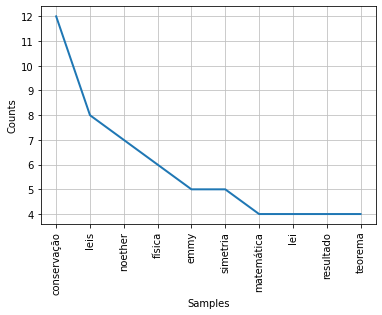

In [19]:
#Estabelecendo a freq.
fdist = FreqDist(clean_words)

#Colocando as 10 palavras mais comuns
fdist.plot(10)
plt.show()

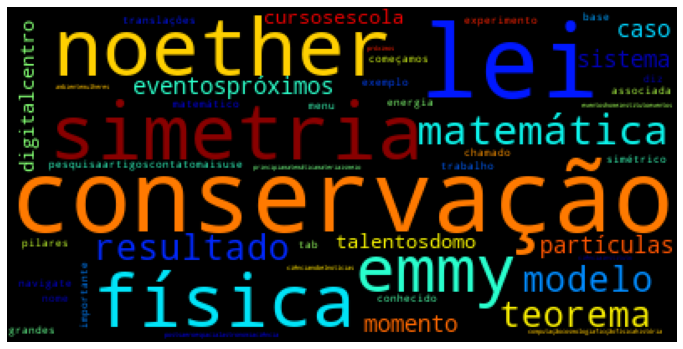

In [20]:
clean_words_string = " ".join(clean_words)

#Gerando a nuvem
wordcloud = WordCloud(background_color='black',colormap='jet').generate(clean_words_string)

#Plotando a nuvem
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

#Removendo os eixos
plt.axis("off")
plt.show()

In [25]:
from nltk.stem.porter import *
import re
import pandas as pd
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\matheus.pavani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
sw_english = set(stopwords.words('english'))
stemmer = PorterStemmer()
movies = pd.read_csv('movies.csv', index_col = 0)
movies_sample = movies.sample(frac = 0.2, replace=False)

In [27]:
def preprocess(string):
    ###
    # Deixa apenas elementos alfanuméricos
    string = re.sub(r"[^a-zA-Z0-9]+", ' ', string)
    ###
    # deixa todas as palavras minúsculas
    string = string.lower()
    ###
    # tokenização
    words = word_tokenize(string)
    ###
    # Remove Stopwords
    filtered_words = [word for word in words if word not in sw_english]

    # Aplica o Stemming
    stem_words = []
    for w in filtered_words:
        s_words = stemmer.stem(w)
        stem_words.append(s_words)
    ###
    # Retorna a lista de palavras pré-processadas
    return stem_words

In [28]:
movies_sample["filtered_words"] = movies_sample['text'].apply(lambda x: preprocess(x))

movies_sample['join_words'] = movies_sample['filtered_words'].apply(lambda x: ' '.join(x))

In [29]:
movies_sample.head()

,text,label,filtered_words,join_words
5594,"Very outdated film with awful, cliché-ridden a...",0,"[outdat, film, aw, clich, ridden, mawkish, dia...",outdat film aw clich ridden mawkish dialog poo...
3075,Having just seen the A Perfect Spy mini series...,1,"[seen, perfect, spi, mini, seri, one, go, one,...",seen perfect spi mini seri one go one noth dof...
26435,I saw Saving Grace right after it came out on ...,1,"[saw, save, grace, right, came, video, sinc, b...",saw save grace right came video sinc becom one...
4191,"Beyond dirt cheap, this shot-on-video exercise...",0,"[beyond, dirt, cheap, shot, video, exercis, in...",beyond dirt cheap shot video exercis ineptitud...
31046,"After being bitten by a bat in a cave,a doctor...",0,"[bitten, bat, cave, doctor, name, john, beck, ...",bitten bat cave doctor name john beck undergo ...


In [30]:
movies_sample  = movies_sample.drop(columns=['text', 'filtered_words'])

movies_sample.head()

,label,join_words
5594,0,outdat film aw clich ridden mawkish dialog poo...
3075,1,seen perfect spi mini seri one go one noth dof...
26435,1,saw save grace right came video sinc becom one...
4191,0,beyond dirt cheap shot video exercis ineptitud...
31046,0,bitten bat cave doctor name john beck undergo ...


In [31]:
movies_sample  = movies_sample.reset_index(drop=True)

movies_sample.head()

,label,join_words
0,0,outdat film aw clich ridden mawkish dialog poo...
1,1,seen perfect spi mini seri one go one noth dof...
2,1,saw save grace right came video sinc becom one...
3,0,beyond dirt cheap shot video exercis ineptitud...
4,0,bitten bat cave doctor name john beck undergo ...


In [32]:
movies_sample['label'].value_counts()

0    5054
1    4946
Name: label, dtype: int64

In [34]:
movies_sample.isnull().sum()

label         0
join_words    0
dtype: int64

In [58]:
movies_sample['join_words'][0]

'outdat film aw clich ridden mawkish dialog poor construct addit cassavet falk overact constantli pseudo good movi take time discov catastroph intellectu turkey first scene total bore fill histrion hyster exchang sound horribl camera movement without imagin build charact poetri subtl psycholog interest shot actor smoke constantli see ad beer beverag cheap inde one except ned beatti nice simpl way play hit man'

In [33]:
# BoW --> transformar textos em matrizes por similaridade ---> transformação esparsa
# Embbedings --> transformação densa

# Tf-idf : tf(t,d) / idf(t,D) = log(|D|/n_t) ---> tf*idf : a importância de um termo

# sklearn: CountVectorizer e TfidfTranformer / TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

X = movies_sample['join_words']
y = movies_sample['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

In [35]:
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)



In [59]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

text_c = Pipeline([('tfidf', TfidfVectorizer()),('c', RandomForestClassifier())])

text_c

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('c', RandomForestClassifier())])

In [60]:
text_c.fit(X_train, y_train)

predictions = text_c.predict(X_test)

In [61]:
predictions

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [62]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve

confusion_matrix(y_test, predictions)

array([[1266,  231],
       [ 253, 1250]], dtype=int64)

In [63]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1497
           1       0.84      0.83      0.84      1503

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.84      0.84      0.84      3000



In [64]:
print(accuracy_score(y_test, predictions))

0.8386666666666667


In [65]:
y_prob_rf = text_c.predict_proba(X_test)
y_prob_rf = y_prob_rf[:, 1]

In [66]:
y_prob_rf

array([0.32, 0.61, 0.31, ..., 0.28, 0.77, 0.48])

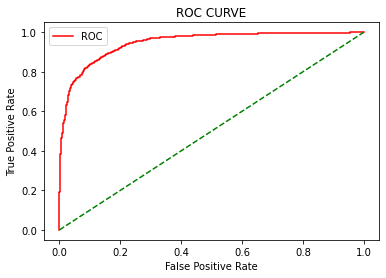

In [67]:
fp, tp, thresholds = roc_curve(y_test, y_prob_svm)
plt.plot(fp, tp, color = 'red', label = 'ROC')
plt.plot([0,1], [0,1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend()
plt.show()

In [68]:
auc = roc_auc_score(y_test, y_prob_rf)

print(auc)

0.9165178882937753


In [70]:
text_c.predict(['outdat film aw clich ridden mawkish dialog poor construct addit cassavet falk overact constantli pseudo good movi take time discov catastroph intellectu turkey first scene total bore fill histrion hyster exchang sound horribl camera movement without imagin build charact poetri subtl psycholog interest shot actor smoke constantli see ad beer beverag cheap inde one except ned beatti nice simpl way play hit man'
])

array([0], dtype=int64)